<a href="https://colab.research.google.com/github/phil-debug/Python-Trading-Project/blob/main/Algorithmic_Trading_Python_2023_Task_Workbook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 
 
1.    Download 20 Stocks

2.   Calculate risk reward potential

1.   Compare covarience and corrolation 

Task Completed (30/5/23)

In [31]:
# Task one 

import yfinance as yf
import pandas as pd
import datetime as dt
from pandas.tseries.offsets import MonthEnd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print('import modules complete')

import modules complete


In [19]:
#Create a list of tickers then import the data from y finance. Saving to a variable called stocks
tickers = ["AAPL", "AMZN", "GOOGL", "MSFT", "JPM", "V", "WMT", "JNJ", "PG", "XOM", "T", "BAC", "INTC", "CSCO", "VZ", "DIS", "HD", "IBM", "CVX", "PFE"]
Stocks = yf.download(tickers, start = "2010-01-01", end = "2022-01-01")

[*********************100%***********************]  20 of 20 completed


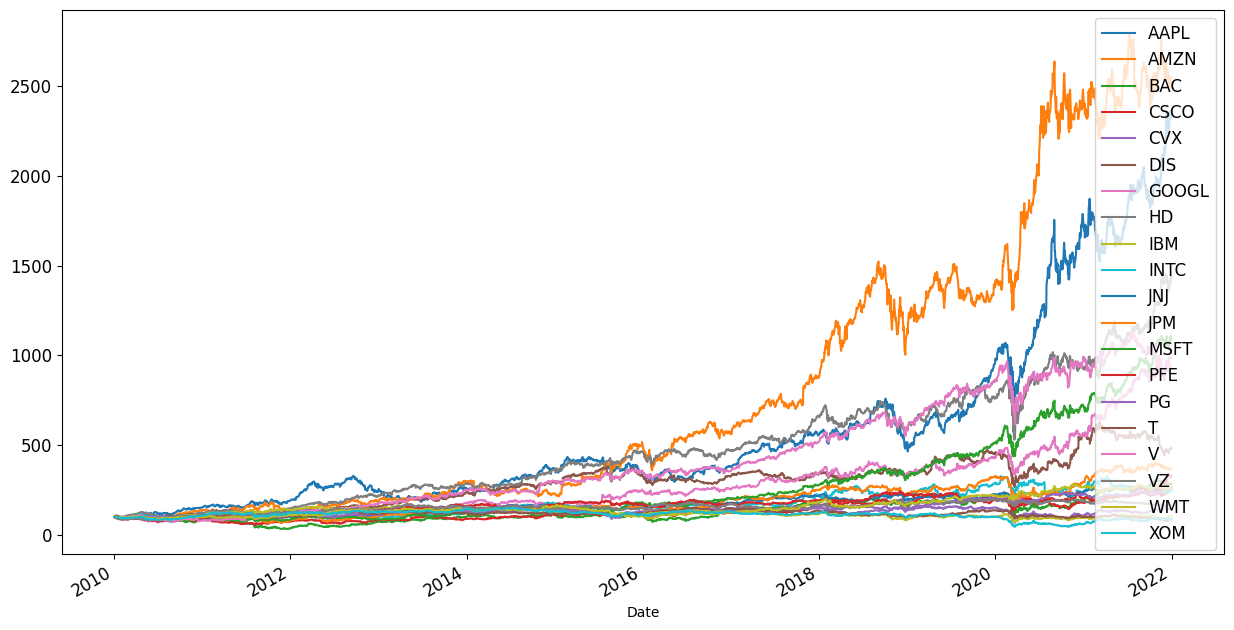

In [20]:
#Find and normalise close  and then plot to line chart to use for reference

close=Stocks.loc[: ,"Close"].copy()
norm_close=close.div(close.iloc[0]).mul(100)
norm_close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [21]:
#Find the returns 
ret = close.pct_change().dropna()
ret.head()

,AAPL,AMZN,BAC,CSCO,CVX,DIS,GOOGL,HD,IBM,INTC,JNJ,JPM,MSFT,PFE,PG,T,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.001729,0.005900,0.032505,-0.004455,0.007083,-0.002495,-0.004404,0.007325,-0.012080,-0.000479,-0.011596,0.019370,0.000323,-0.014263,0.000327,-0.004899,-0.011459,0.001803,-0.009958,0.003905
2010-01-06,-0.015906,-0.018116,0.011728,-0.006509,0.000126,-0.005314,-0.025209,-0.003463,-0.006496,-0.003354,0.008134,0.005494,-0.006137,-0.003215,-0.004743,-0.029184,-0.013428,-0.042591,-0.002235,0.008643
2010-01-07,-0.001849,-0.017013,0.032947,0.004505,-0.003767,0.000314,-0.023280,0.011814,-0.003462,-0.009615,-0.007137,0.019809,-0.010400,-0.003763,-0.005423,-0.011228,0.009307,-0.005952,0.000560,-0.003142
2010-01-08,0.006648,0.027077,-0.008860,0.005300,0.001765,0.001571,0.013331,-0.004808,0.010035,0.011165,0.003438,-0.002456,0.006897,0.008095,-0.001322,-0.007326,0.002766,0.000630,-0.005037,-0.004012
2010-01-11,-0.008821,-0.024041,0.008939,-0.002839,0.017742,-0.016311,-0.001512,-0.028295,-0.010470,0.005761,0.000156,-0.003357,-0.012720,0.008030,-0.003971,-0.004797,-0.002874,0.004094,0.016501,0.011220


In [22]:
# mean and std 
summary = ret.describe().T.loc[:,["mean","std"]]
summary.head()


,mean,std
AAPL,0.001199,0.017680
AMZN,0.001257,0.019637
BAC,0.000588,0.022005
CSCO,0.000453,0.016710
CVX,0.000277,0.017071


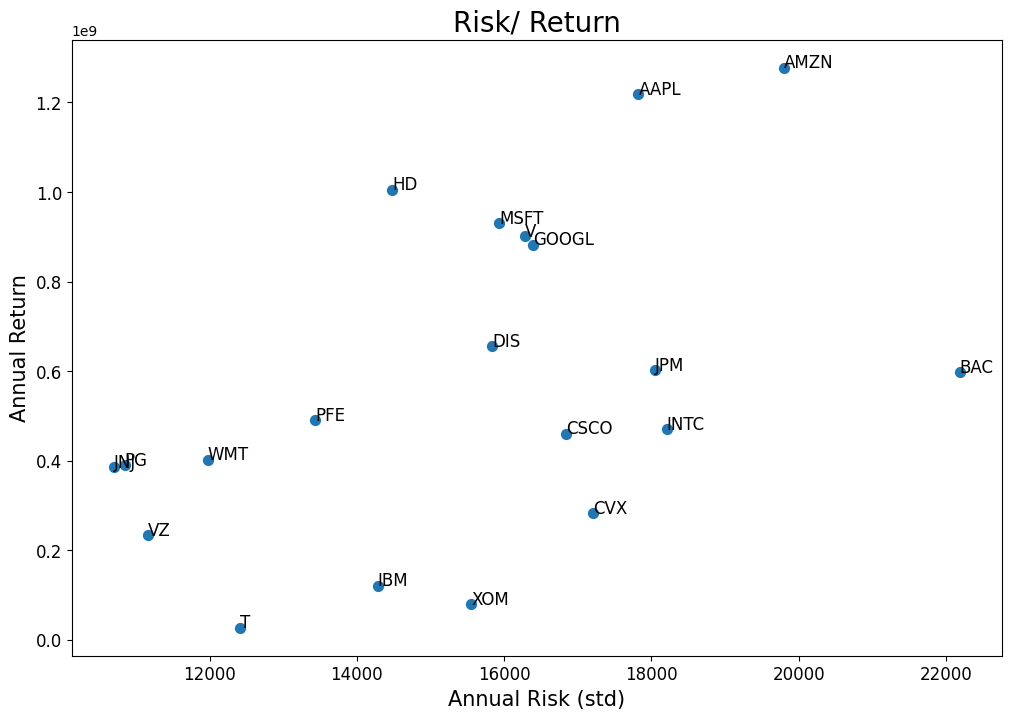

In [27]:


summary["mean"] = summary ["mean"] * 252
summary["std"] = summary ["std"] * np.sqrt(252) 


summary.plot.scatter(x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 12) 
for i in summary.index:
  plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=12)



plt.xlabel("Annual Risk (std)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/ Return", fontsize = 20)
plt.show()


<Axes: >

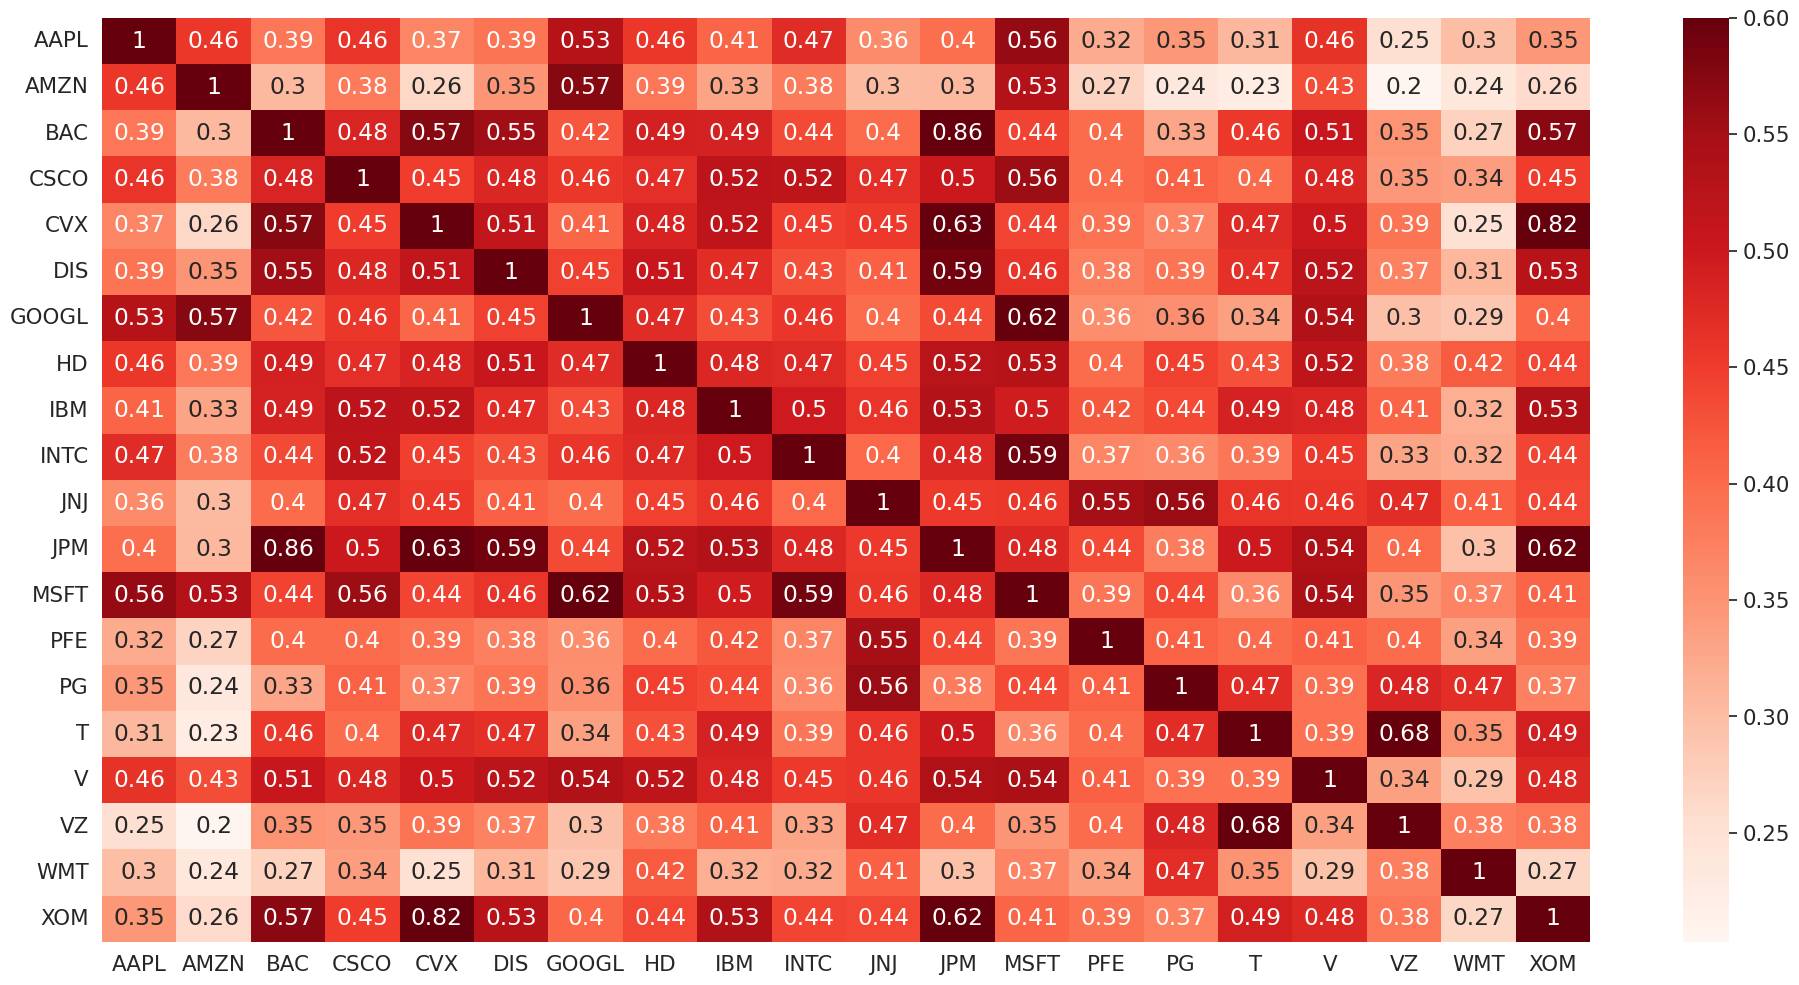

In [36]:
#Compare covarience and corrolation 

plt.figure(figsize = (24,12))
sns.set(font_scale = 1.4)

sns.heatmap(ret.corr(),cmap='Reds',annot=True,vmax=0.6,)